# Kalbe- Final Project 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Baca data (Jumlah baris dan kolom)

In [2]:
df_transaction = pd.read_csv('C:/Users/Lenovo/Documents/Kalbe-Final Project/Case Study - Transaction (1).csv', delimiter=';')
df_customer = pd.read_csv('C:/Users/Lenovo/Documents/Kalbe-Final Project/Case Study - Customer (1).csv', delimiter=';')
df_store =  pd.read_csv('C:/Users/Lenovo/Documents/Kalbe-Final Project/Case Study - Store (1).csv', delimiter=';')
df_product = pd.read_csv('C:/Users/Lenovo/Documents/Kalbe-Final Project/Case Study - Product (1).csv', delimiter=';')

In [3]:
df_transaction.shape, df_customer.shape, df_store.shape, df_product.shape

((5020, 8), (447, 5), (14, 6), (10, 3))

# Data Preprocessing dan cleansing

In [4]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [5]:
df_transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [6]:
df_transaction.duplicated().sum()

0

In [7]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [7]:
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [8]:
df_customer['Marital Status'] = df_customer['Marital Status'].fillna(df_customer['Marital Status'].mode()[0])

In [9]:
df_customer.duplicated().sum()

0

In [11]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [10]:
df_store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [11]:
df_store.duplicated().sum()

0

In [14]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [12]:
df_product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [13]:
df_product.duplicated().sum()

0

In [16]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [17]:
df_transaction.dtypes

TransactionID    object
CustomerID        int64
Date             object
ProductID        object
Price             int64
Qty               int64
TotalAmount       int64
StoreID           int64
dtype: object

In [20]:
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')

In [21]:
df_customer.dtypes

CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
dtype: object

In [22]:
# Mengubah tipe data Income
df_customer['Income'] = df_customer['Income'].replace('[,]','.',regex=True).astype('float')

In [23]:
df_store.dtypes

StoreID        int64
StoreName     object
GroupStore    object
Type          object
Latitude      object
Longitude     object
dtype: object

In [24]:
# Mengubah tipe data latitude dan longitude

df_store['Latitude'] = df_store['Latitude'].replace('[,]','.', regex=True).astype('float')
df_store['Longitude'] = df_store['Longitude'].replace('[,]','.', regex=True).astype('float')

In [25]:
df_product.dtypes

ProductID       object
Product Name    object
Price            int64
dtype: object

In [26]:
df_transaction['TransactionID'].value_counts()

TransactionID
TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: count, Length: 4908, dtype: int64

In [27]:
df_transaction[df_transaction['TransactionID'] == 'TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [28]:
df_transaction.sort_values(by='Date', ascending=False, inplace=True)

In [29]:
df_transaction.drop_duplicates(subset='TransactionID', keep='last', inplace=True)

In [30]:
df_transaction['TransactionID'].value_counts()

TransactionID
TR85684    1
TR58087    1
TR40363    1
TR28966    1
TR9310     1
          ..
TR63825    1
TR22235    1
TR43983    1
TR37397    1
TR11369    1
Name: count, Length: 4908, dtype: int64

# Menggabungkan data

In [31]:
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [32]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR85684,55,2022-12-31,P8,16000,1,16000,6,34,1,Married,8.44,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
1,TR29093,232,2022-07-09,P8,16000,3,48000,6,62,0,Married,7.32,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
2,TR48254,195,2022-08-28,P8,16000,1,16000,6,31,1,Married,10.91,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
3,TR23475,128,2022-11-11,P8,16000,3,48000,6,0,1,Married,6.77,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
4,TR33420,296,2022-06-06,P8,16000,3,48000,6,38,1,Single,3.18,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379


# Machine learning model (time series model)

In [33]:
df_regresi_product = df_merge.groupby(['ProductID', 'Date']).agg({ 
'Qty' : 'sum' 
}).reset_index()

In [34]:
df_regresi_product[df_regresi_product['ProductID']=='P1'].drop(columns=['ProductID'])

,Date,Qty
0,2022-01-01,11
1,2022-01-02,17
2,2022-01-05,4
3,2022-01-07,7
4,2022-01-08,5
...,...,...
233,2022-12-25,10
234,2022-12-26,5
235,2022-12-27,8
236,2022-12-28,15


In [35]:
df_regresi_by_date = df_merge.groupby(['Date']).agg({ 
    'Qty' : 'sum' 
}).reset_index()

In [36]:
df_regresi_by_date

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,41


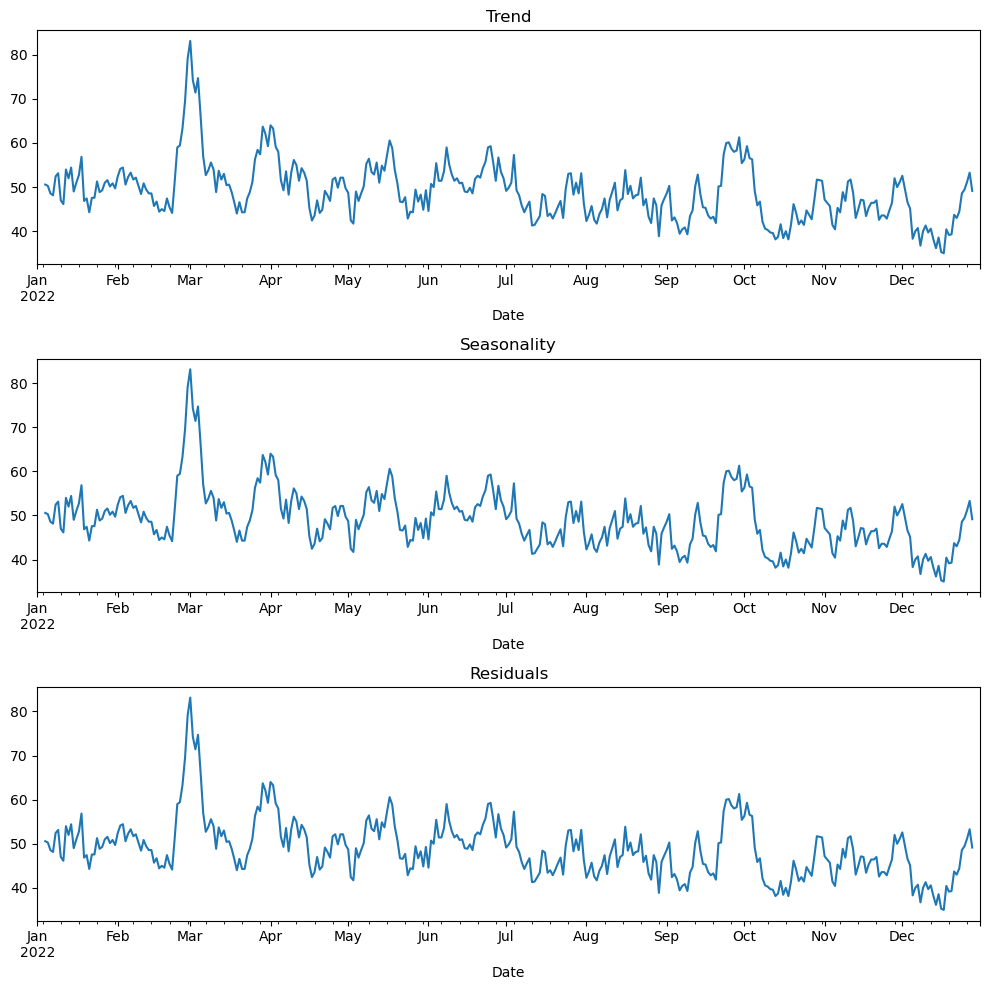

In [37]:
decomposed = seasonal_decompose(df_regresi_by_date.set_index('Date'))

plt.figure(figsize=(10, 10))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.trend.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.trend.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

# Uji Statisioner

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_regresi_by_date['Qty'])
print('ADF-Statistics : %f' % result[0])
print('p-value : %f' % result[1])
print('Critical values:')
for key, values in result[4].items(): 
    print('\t%s: %.3f' % (key, values))

ADF-Statistics : -18.844276
p-value : 0.000000
Critical values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


# Cek uji Statisioner

In [39]:
cut_off = round(df_regresi_by_date.shape[0] * 0.8)
df_train = df_regresi_by_date[:cut_off]
df_test = df_regresi_by_date[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [40]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
287,2022-10-15,33
288,2022-10-16,26
289,2022-10-17,53
290,2022-10-18,47


In [41]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,41


# Visualisasi data train dan data test

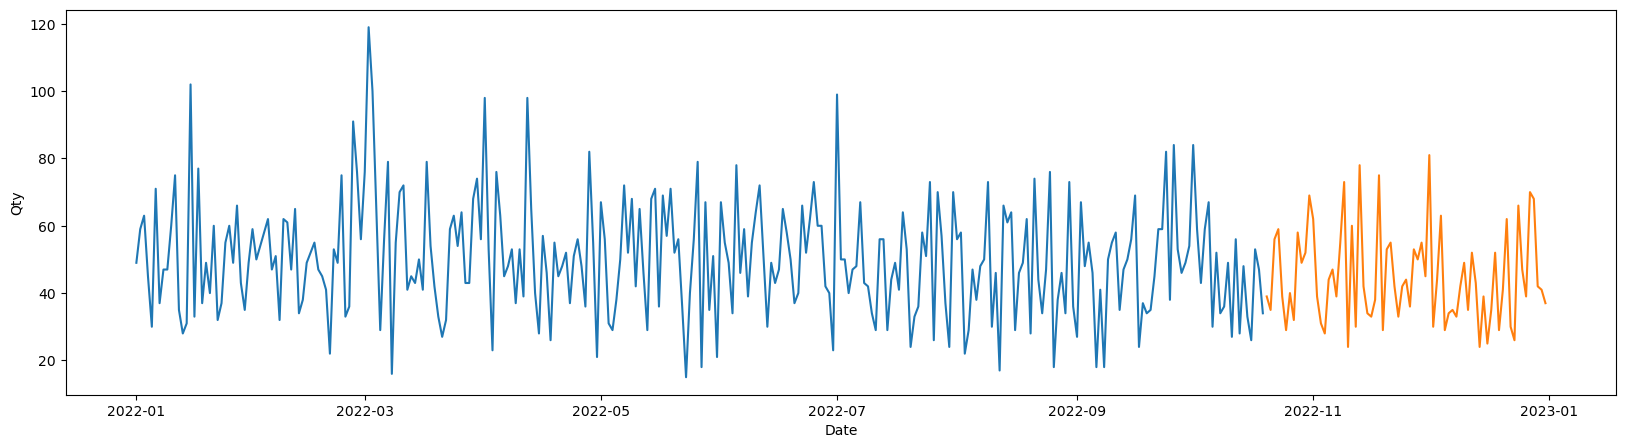

In [42]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty']);

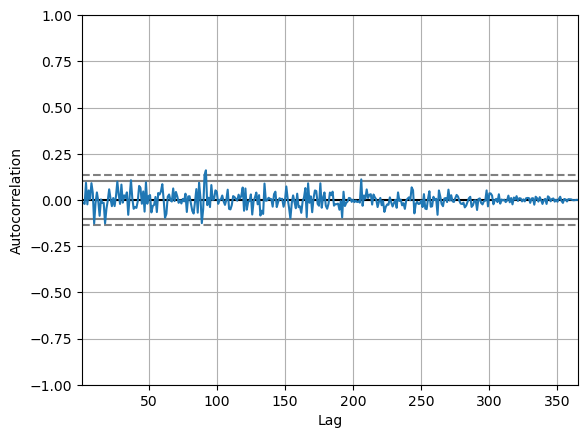

In [69]:
autocorrelation_plot(df_regresi_by_date['Qty']);

In [43]:
def rmse(y_actual, y_pred):
    """
    function to calculate RMSE
    """
    
    print(f'RMSE value{mean_squared_error(y_actual, y_pred)**0.5}') 
    
def eval(y_actual, y_pred):
    """
    function to evaluation machine learning model 
    """
    rmse(y_actual, y_pred)
    print(f'MAE value{mean_absolute_error(y_actual, y_pred)}')

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA par

RMSE value14.446197526496897
MAE value11.87986449757271


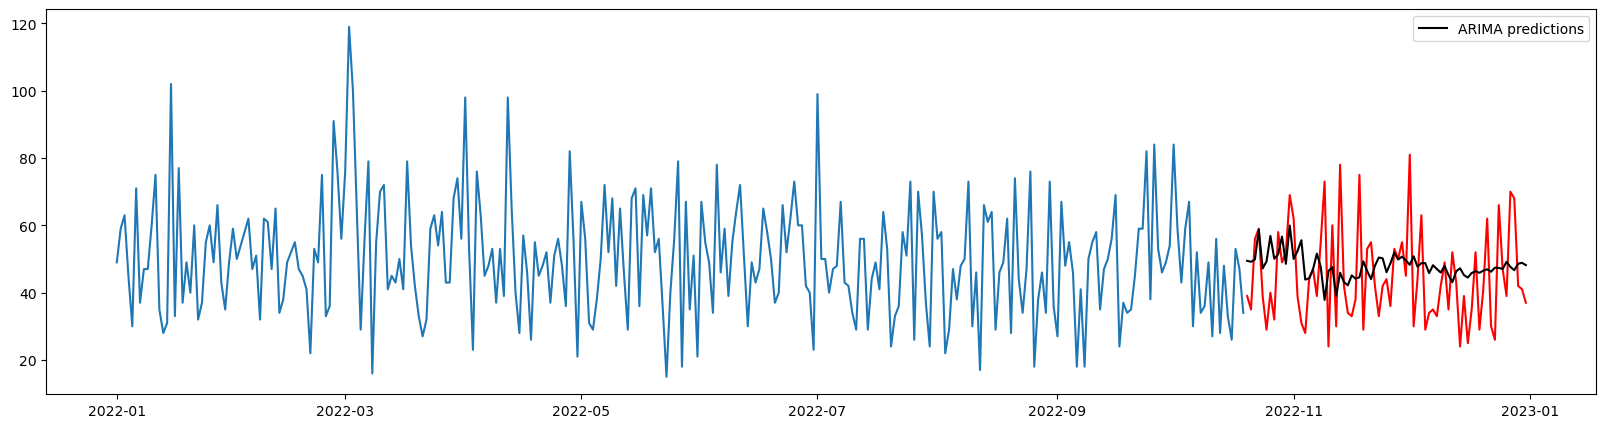

In [44]:
# ARIMA Model

df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAmodel = ARIMA(y, order = (40, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end =y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']
eval(df_test['Qty'], y_pred_out)

plt.figure(figsize=(20,5))
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label='ARIMA predictions')
plt.legend()

# Melakukan Clusterting

In [45]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR85684,55,2022-12-31,P8,16000,1,16000,6,34,1,Married,8.44,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
1,TR29093,232,2022-07-09,P8,16000,3,48000,6,62,0,Married,7.32,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
2,TR48254,195,2022-08-28,P8,16000,1,16000,6,31,1,Married,10.91,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
3,TR23475,128,2022-11-11,P8,16000,3,48000,6,0,1,Married,6.77,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379
4,TR33420,296,2022-06-06,P8,16000,3,48000,6,38,1,Single,3.18,Oat,Lingga,Lingga,Modern Trade,-5.135399,119.42379


In [53]:
correlation = df_merge[['CustomerID','Price', 'Qty', 'TotalAmount', 'Age', 'Income', 'Latitude', 'Longitude']].corr()
correlation

,CustomerID,Price,Qty,TotalAmount,Age,Income,Latitude,Longitude
CustomerID,1.000000,-0.017243,-0.013688,-0.027610,-0.023987,0.008730,0.003134,0.001735
Price,-0.017243,1.000000,-0.352410,0.440281,0.014913,-0.000098,-0.029077,0.019762
Qty,-0.013688,-0.352410,1.000000,0.622878,-0.027062,-0.023211,-0.003177,0.004150
TotalAmount,-0.027610,0.440281,0.622878,1.000000,-0.015971,-0.022339,-0.029315,0.025675
Age,-0.023987,0.014913,-0.027062,-0.015971,1.000000,0.490239,0.006896,0.018545
Income,0.008730,-0.000098,-0.023211,-0.022339,0.490239,1.000000,0.012746,0.001950
Latitude,0.003134,-0.029077,-0.003177,-0.029315,0.006896,0.012746,1.000000,-0.396814
Longitude,0.001735,0.019762,0.004150,0.025675,0.018545,0.001950,-0.396814,1.000000


In [56]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID' : 'count', 
    'Qty' : 'sum', 
    'TotalAmount' : 'sum' 
}).reset_index().rename(columns={
    'TransactionID' : 'count_transaction', 
    'Qty' : 'total_qty'
})

In [57]:
df_cluster.head()

,CustomerID,count_transaction,total_qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [58]:
data_cluster = df_cluster.drop(columns=['CustomerID'])

data_cluster_normalize = preprocessing.normalize(data_cluster)

In [71]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state=0, n_init='auto').fit(data_cluster)
    
    fits.append(model)
    
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

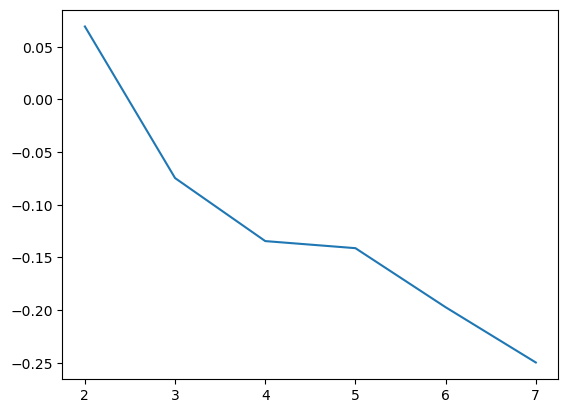

In [72]:
# Elbow method


sns.lineplot(x = K, y = score);

In [69]:
fits[2]

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [73]:
df_cluster['cluster_label'] = fits[1].labels_

In [74]:
df_cluster

,CustomerID,count_transaction,total_qty,TotalAmount,cluster_label
0,1,17,60,623300,0
1,2,13,57,392300,1
2,3,15,56,446200,1
3,4,10,46,302500,1
4,5,7,27,268600,2
...,...,...,...,...,...
442,443,15,54,410100,1
443,444,18,62,577700,0
444,445,18,68,587200,0
445,446,11,42,423300,1


In [75]:
df_cluster.groupby(['cluster_label']).agg({
'CustomerID' : 'count', 
'count_transaction' : 'mean', 
'total_qty' : 'mean', 
'TotalAmount' : 'mean' 
})

,CustomerID,count_transaction,total_qty,TotalAmount
cluster_label,,,,
0,93,14.956989,57.000000,538617.204301
1,194,11.391753,41.453608,369140.206186
2,160,8.168750,28.500000,230300.000000


# Interpretasi dan Rekomendasi Bisnis

Cluster 0 -> Kelompok paling sedikit namun transaksi atau belanja paling tinggi dengan jumlah barang yang 
dibeli dalam kuantitas banyak/tinggi, dengna jumlah paling banyak.

Cluster 1 -> Kelompok paling banyak dengan belanja pada rata-rata, dengan kuantitas rata-rata dan jumlah rata-rata.

Cluster 2 -> Kelompok dengan jumlah rata-rata, dengan belanja paling sedikit dan kuantitas paling sedikit 
dan jumlah paling sedikit 

# Rekomendasi bisnis

1. Berdasarkan clustering customer, cluster 0 merupakan customer paling sering atau banyak melakukan transaksi 
sehingga diperlukan program khusus seperti kartu member dengan fasilitas atau benefit atau diskon dalam berbelanja sehingga customer pada cluster 0 akan semakin sering atau nyaman/loyal berbelanja dengan perusahaan kita.

2. Cluster 1 merupakan customer dengan belanja menengah atau rata-rata dapat diberikan diskon/promo, mengingat 
customer ini terbilang cukup aktif sehingga dengan adanya promo/diskon akan meningkatkan intensitas belanja kepada perusahaan.